In [1]:
# !pip install hvplot
# !pip install jupyterlab
# !pip install jupyter_bokeh

In [2]:
# Import necessary packages
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')

import hvplot.pandas

#### Dataset

Credit to _Our World in Data_
github: https://github.com/gyleodhis/owid_co2_data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/gyleodhis/owid_co2_data/master/owid-co2-data.csv')

Note that the country column here also includes continents

In [4]:
df.head(20)

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001733e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
5,AFG,Afghanistan,1954,0.106,0.013,NaN,NaN,NaN,0.043,0.005,...,NaN,NaN,NaN,NaN,NaN,8151316.0,1.086636e+10,NaN,NaN,NaN
6,AFG,Afghanistan,1955,0.154,0.019,NaN,NaN,NaN,0.062,0.008,...,NaN,NaN,NaN,NaN,NaN,8270992.0,1.107819e+10,NaN,NaN,NaN
7,AFG,Afghanistan,1956,0.183,0.022,NaN,NaN,NaN,0.062,0.007,...,NaN,NaN,NaN,NaN,NaN,8398873.0,1.158124e+10,NaN,NaN,NaN
8,AFG,Afghanistan,1957,0.293,0.034,NaN,NaN,NaN,0.077,0.009,...,NaN,NaN,NaN,NaN,NaN,8535157.0,1.157897e+10,NaN,NaN,NaN
9,AFG,Afghanistan,1958,0.330,0.038,NaN,NaN,NaN,0.092,0.011,...,NaN,NaN,NaN,NaN,NaN,8680097.0,1.223884e+10,NaN,NaN,NaN


In [5]:
df.columns

Index(['iso_code', 'country', 'year', 'co2', 'co2_per_capita', 'trade_co2',
       'cement_co2', 'cement_co2_per_capita', 'coal_co2',
       'coal_co2_per_capita', 'flaring_co2', 'flaring_co2_per_capita',
       'gas_co2', 'gas_co2_per_capita', 'oil_co2', 'oil_co2_per_capita',
       'other_industry_co2', 'other_co2_per_capita', 'co2_growth_prct',
       'co2_growth_abs', 'co2_per_gdp', 'co2_per_unit_energy',
       'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_co2', 'cumulative_cement_co2',
       'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'trade_co2_share',
       'share_global_co2', 'share_global_cement_co2', 'share_global_coal_co2',
       'share_global_flaring_co2', 'share_global_gas_co2',
       'share_global_oil_co2', 'share_global_other_co2',
       'share_global_cumulative_co2', 'share_global_cumulative_cement_co2',
       'share_global_cumulative_c

In [6]:
df[df['country'] == 'World']

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
25458,OWID_WRL,World,1750,9.351,0.012,NaN,NaN,NaN,9.351,0.012,...,NaN,NaN,NaN,NaN,NaN,7.456644e+08,NaN,NaN,NaN,NaN
25459,OWID_WRL,World,1751,9.351,NaN,NaN,NaN,NaN,9.351,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25460,OWID_WRL,World,1752,9.354,NaN,NaN,NaN,NaN,9.354,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25461,OWID_WRL,World,1753,9.354,NaN,NaN,NaN,NaN,9.354,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25462,OWID_WRL,World,1754,9.358,NaN,NaN,NaN,NaN,9.358,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25724,OWID_WRL,World,2016,35452.459,4.750,-0.0,1478.758,0.198,14360.628,1.924,...,6.184,8172.01,1.095,3027.74,0.406,7.464344e+09,1.071343e+14,153261.574,20532.490,1.431
25725,OWID_WRL,World,2017,35925.738,4.760,0.0,1500.493,0.199,14453.702,1.915,...,6.197,8228.64,1.090,3078.27,0.408,7.548183e+09,1.104307e+14,156062.390,20675.493,1.413
25726,OWID_WRL,World,2018,36646.140,4.802,-0.0,1566.740,0.205,14718.145,1.929,...,6.238,8298.27,1.089,3063.75,0.402,7.631091e+09,1.136302e+14,160036.073,20971.585,1.408
25727,OWID_WRL,World,2019,36702.503,4.758,0.0,1608.472,0.208,14573.219,1.889,...,NaN,NaN,NaN,NaN,NaN,7.713468e+09,NaN,161530.754,20941.391,NaN


### 1. Some Minor Data Processing

In [7]:
# Fill NAs with 0s and create GDP per capita column
df = df.fillna(0)
df['gdp_capita'] = np.where(df['population']!=0, df['gdp']/df['population'], 0)

In [8]:
# Make DataFrame Pipeline Interactive
idf = df.interactive()

### 2. CO2 Emission Over Time by Continent

In [9]:
# Define Panel Widgets
year_slider = pn.widgets.IntSlider(name='Year Slider', start=1750, end=2020, step=5, value=1850)
year_slider

BokehModel(combine_events=True, render_bundle={'docs_json': {'24b99beb-313c-4778-9afa-1bd4b8e9cf76': {'version…

In [10]:
# Radio buttons for C02 measures
yaxis_co2 = pn.widgets.RadioButtonGroup(
    name='Y axis',
    options=['co2', 'co2_per_capita',],
    button_type='success'
)

In [11]:
continents= ['World', 'Asia', 'Oceania', 'Europe', 'Africa', 'North America', 'South America', 'Antartica']

co2_pipeline = (
    idf[
        (idf.year <= year_slider) &
        (~idf.country.isin(continents))
    ]
    .groupby(['country', 'year'])[yaxis_co2].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')
    .reset_index(drop=True)
)


In [12]:
co2_pipeline

BokehModel(combine_events=True, render_bundle={'docs_json': {'6406331f-a785-4b7d-ab3a-9c4adf915f45': {'version…

In [13]:
co2_plot = co2_pipeline.hvplot(x = 'year', by='country', y=yaxis_co2, line_width=2, title="CO2 emission by continent")
co2_plot

BokehModel(combine_events=True, render_bundle={'docs_json': {'3fcd27fe-9668-4cf3-bacb-73a16f914160': {'version…

### 3. Table - CO2 emission over time by continent

In [14]:
co2_table = co2_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width')
co2_table

BokehModel(combine_events=True, render_bundle={'docs_json': {'d6f56514-1ef1-45d9-913a-911b80d81c46': {'version…

### 4. CO2 vs GDP scatterplot

In [15]:
co2_vs_gdp_scatterplot_pipeline = (
    idf[
        (idf.year == year_slider) &
        (~ (idf.country.isin(continents)))
    ]
    .groupby(['country', 'year', 'gdp_capita'])['co2'].mean()
    .to_frame()
    .reset_index()
    .sort_values(by='year')
    .reset_index(drop=True)
)

In [16]:
co2_vs_gdp_scatterplot_pipeline

BokehModel(combine_events=True, render_bundle={'docs_json': {'23af5f8e-7e54-43a8-ae48-ca2678dc7a25': {'version…

In [17]:
co2_vs_gdp_scatterplot = co2_vs_gdp_scatterplot_pipeline.hvplot(x='gdp_capita',
                                                                y='co2',
                                                                by='country',
                                                                size=80, kind="scatter",
                                                                alpha=0.7,
                                                                legend=False,
                                                                height=500,
                                                                width=500)
co2_vs_gdp_scatterplot

BokehModel(combine_events=True, render_bundle={'docs_json': {'bb270a4a-6f73-4f15-bb26-7d3cf1c9dab1': {'version…

### 5. Bar Chart with CO2 Sources by Continent

In [18]:
yaxis_co2_source = pn.widgets.RadioButtonGroup(
    name='Y axis',
    options=['coal_co2', 'oil_co2', 'gas_co2'],
    button_type='success'
)

continents_excl_world = ['Asia', 'Oceania', 'Europe', 'Africa', 'North America', 'South America', 'Antartica']

co2_source_bar_pipeline = (
    idf[
        (idf.year == year_slider) &
        (idf.country.isin(continents_excl_world))
    ]
    .groupby(['year', 'country'])[yaxis_co2_source].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='year')
    .reset_index(drop=True)
)

In [19]:
co2_source_bar_plot = co2_source_bar_pipeline.hvplot(kind='bar',
                                                     x='country',
                                                     y=yaxis_co2_source,
                                                     title='CO2 source by continent')
co2_source_bar_plot

BokehModel(combine_events=True, render_bundle={'docs_json': {'ee0cd9d6-d6f1-4638-a88f-e0723714a8c8': {'version…

### 6. Creating Dashboard

In [20]:
#Layout using Template
template = pn.template.FastListTemplate(
    title='World CO2 emission dashboard', 
    sidebar=[pn.pane.Markdown("# CO2 Emissions and Climate Change"), 
             pn.pane.Markdown("#### Carbon dioxide emissions are the primary driver of global climate change. It’s widely recognised that to avoid the worst impacts of climate change, the world needs to urgently reduce emissions. But, how this responsibility is shared between regions, countries, and individuals has been an endless point of contention in international discussions."), 
             pn.pane.PNG(r'C:\Users\60115\Documents\Project\Python\Project1\climate_day.png', sizing_mode='scale_both'),
             pn.pane.Markdown("## Settings"),   
             year_slider],
    main=[pn.Row(pn.Column(yaxis_co2, 
                           co2_plot.panel(width=700), margin=(0,25)), 
                 co2_table.panel(width=500)), 
          pn.Row(pn.Column(co2_vs_gdp_scatterplot.panel(width=600), margin=(0,25)), 
                 pn.Column(yaxis_co2_source, co2_source_bar_plot.panel(width=600)))],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
# template.show()
template.servable();

FastListTemplate
    [js_area] HTML(None, height=0, margin=0, sizing_mode='fixed', width=0)
    [actions] TemplateActions()
    [browser_info] BrowserInfo()
    [busy_indicator] LoadingSpinner(height=20, width=20)
    [main-1848066123264] Row
        [0] Column(margin=(0, 25))
            [0] RadioButtonGroup(button_type='success', name='Y axis', options=['co2', 'co2_per_capita'], value='co2')
            [1] ParamFunction(function, _pane=HoloViews, defer_load=False, width=700)
        [1] ParamFunction(function, _pane=Tabulator, defer_load=False, width=500)
    [main-1848066122304] Row
        [0] Column(margin=(0, 25))
            [0] ParamFunction(function, _pane=HoloViews, defer_load=False, width=600)
        [1] Column
            [0] RadioButtonGroup(button_type='success', name='Y axis', options=['coal_co2', 'oil_co2', ...], value='coal_co2')
            [1] ParamFunction(function, _pane=HoloViews, defer_load=False, width=600)
    [nav-1848064392560] Markdown(str)
    [nav-1847664202752] Markdown(str)
    [nav-1848065921088] PNG(str, sizing_mode='scale_both')
    [nav-1848068000944] Markdown(str)
    [nav-1847992884336] IntSlider(end=2020, name='Year Slider', start=1750, step=5, value=1850)
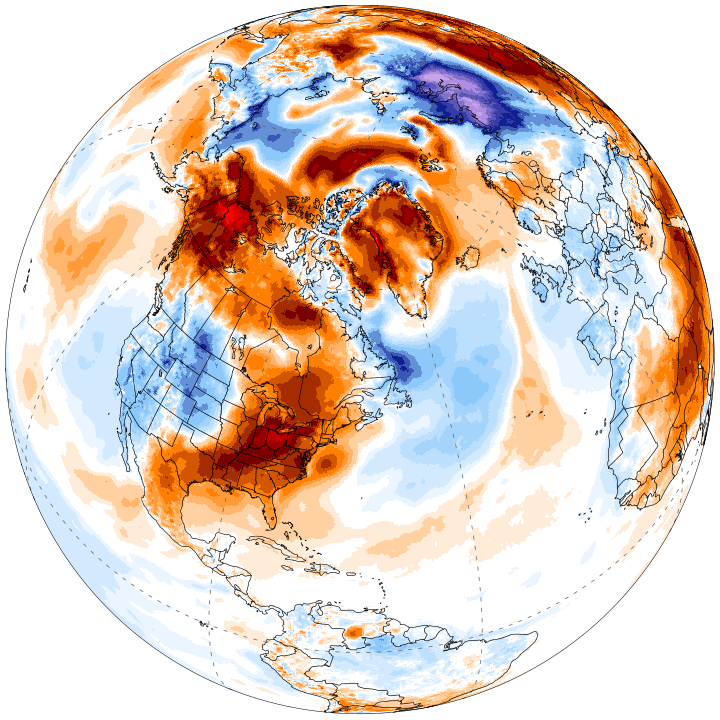

In [21]:
template